<a href="https://colab.research.google.com/github/Viku-51/Twitter-Sentiment-Analysis/blob/main/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Twitter Viral Prediction

In [6]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [12]:
from google.colab import files
uploaded= files.upload()

Saving login.csv to login.csv


In [15]:
#Get data
log=pd.read_csv('login.csv')

In [17]:
consumerKey=log['Key'][0]
consumerSecret=log['Key'][1]
accessToken=log['Key'][2]
accessTokenSecret=log['Key'][3]

In [19]:
#Creating authentication object
authenticate=tweepy.OAuthHandler(consumerKey,consumerSecret)
authenticate.set_access_token(accessToken,accessTokenSecret)
api=tweepy.API(authenticate,wait_on_rate_limit=True)

In [27]:
#Extracting 100 tweets from user Elon Musk
posts=api.user_timeline(screen_name="elonmusk",count=100,lang="en",tweet_mode="extended")

print("Show the recent five tweets")
i=1
for tweet in posts[0:5]:
  print(str(i)+')'+ tweet.full_text+'\n')
  i=i+1

Show the recent five tweets
1)@flcnhvy Schedule driver there is regulatory approval. Has to be certified for each aircraft type. Focusing on 737 &amp; A320, as those serve most number of people, with development testing on Gulfstream.

2)All 72 orbital planes activate in August, plus many other improvements, enabling global coverage, except for polar regions, which will take another 6 months

3)Starlink simultaneously active users just exceeded the strategically important threshold of 69,420 last night!

4)@marcodzo @Tesla Sometimes people think it is performance, but safety is always the primary design requirement for a Tesla

5)@greg16676935420 @jack 🤣🤣



In [46]:
#Data Frame creation
df=pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

#First five data 

df.head()

,Tweets
0,@flcnhvy Schedule driver there is regulatory a...
1,"All 72 orbital planes activate in August, plus..."
2,Starlink simultaneously active users just exce...
3,@marcodzo @Tesla Sometimes people think it is ...
4,@greg16676935420 @jack 🤣🤣


In [48]:
#Text clearing

def cleanTxt(text):
  text=re.sub(r'@[A-Za-z0-9]+','',text) # @ mentions is removed
  text=re.sub(r'#','',text)
  text=re.sub(r'RT[\s]+','',text)
  text=re.sub(r'https?:\/\/S+','',text)# Hyperlink removal
    return text
  df['Tweets']=df['Tweets'].apply(cleanTxt)

  df


In [52]:
#Subjectivity 
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Polarity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)
df

,Tweets,Subjectivity,Polarity
0,@flcnhvy Schedule driver there is regulatory a...,0.500000,0.500000
1,"All 72 orbital planes activate in August, plus...",0.281250,0.072917
2,Starlink simultaneously active users just exce...,0.555556,0.088889
3,@marcodzo @Tesla Sometimes people think it is ...,0.500000,0.400000
4,@greg16676935420 @jack 🤣🤣,0.000000,0.000000
5,@lexfridman One of my favorites quotes from a ...,0.425000,0.400000
6,"@jpr007 Actually, a great many parts are produ...",0.531250,0.418750
7,@satyanadella Bring back the Zune!! It’s time.,0.000000,0.000000
8,@DogecoinRise Starship Super Heavy,0.583333,0.066667
9,@Wildreamz @engineers_feed True,0.650000,0.350000


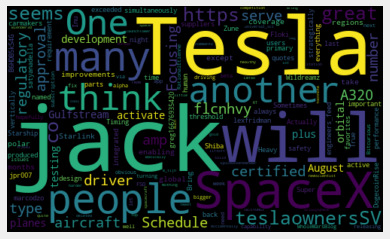

In [56]:
#Word cloud plot
allWords=' '.join( [twts for twts in df['Tweets']] )
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [58]:
#Function to commpute the Positive,Neutral & Positive Analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'
  
df['Analysis']=df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,@flcnhvy Schedule driver there is regulatory a...,0.500000,0.500000,Positive
1,"All 72 orbital planes activate in August, plus...",0.281250,0.072917,Positive
2,Starlink simultaneously active users just exce...,0.555556,0.088889,Positive
3,@marcodzo @Tesla Sometimes people think it is ...,0.500000,0.400000,Positive
4,@greg16676935420 @jack 🤣🤣,0.000000,0.000000,Neutral
5,@lexfridman One of my favorites quotes from a ...,0.425000,0.400000,Positive
6,"@jpr007 Actually, a great many parts are produ...",0.531250,0.418750,Positive
7,@satyanadella Bring back the Zune!! It’s time.,0.000000,0.000000,Neutral
8,@DogecoinRise Starship Super Heavy,0.583333,0.066667,Positive
9,@Wildreamz @engineers_feed True,0.650000,0.350000,Positive


In [60]:
#Print every positve tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Positive'):
     print(str(j)+')'+sortedDF['Tweets'][i])
     print()
     j=j+1


1)@flcnhvy Schedule driver there is regulatory approval. Has to be certified for each aircraft type. Focusing on 737 &amp; A320, as those serve most number of people, with development testing on Gulfstream.

2)All 72 orbital planes activate in August, plus many other improvements, enabling global coverage, except for polar regions, which will take another 6 months

3)Starlink simultaneously active users just exceeded the strategically important threshold of 69,420 last night!

4)@marcodzo @Tesla Sometimes people think it is performance, but safety is always the primary design requirement for a Tesla

5)@lexfridman One of my favorites quotes from a great human

6)@jpr007 Actually, a great many parts are produced by our suppliers, but Tesla is more vertically integrated than other carmakers

7)@DogecoinRise Starship Super Heavy

8)@Wildreamz @engineers_feed True

9)@jack For the Bitcurious? Very well then, let’s do it 😉

10)@RationalEtienne @jack T is the new D



In [62]:
#Negative tweets
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+')'+sortedDF['Tweets'][i])
    print()
    j=j+1

1)@SciGuySpace Nothing wrong with healthy competition, but this seems a little over-the-top. Would be cool if spacecraft could travel from one space station to another (which is much harder than it seems!).



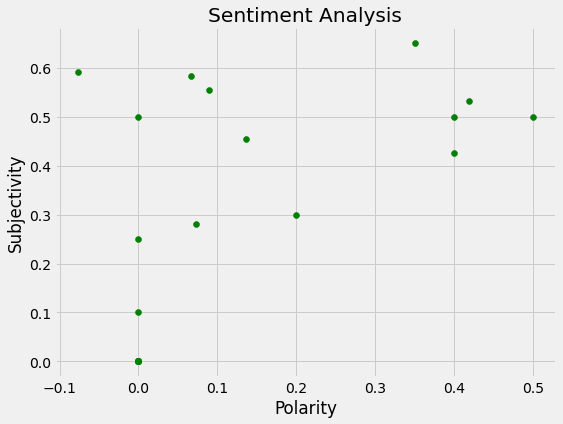

In [64]:
#Plotting the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Green')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [66]:
#Percentage of positive tweets
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']

round(ptweets.shape[0]/df.shape[0]*100,1)

45.5

In [69]:
#Percentage of negative tweets
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Tweets']

round(ntweets.shape[0]/df.shape[0]*100,1)

4.5

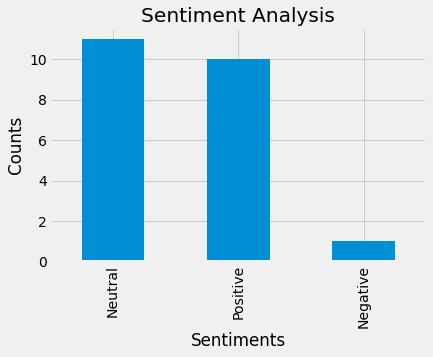

In [72]:
#Value counts
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()